<div id="header"><p style="color:#3364ff; text-align:center; font-weight:bold; font-family:verdana; font-size:25px;">Grover's Algorithm </p></div>

[licenseBDG]: https://img.shields.io/badge/License-CC-orange?style=plastic
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[mywebsiteBDG]:https://img.shields.io/badge/website-jaorduz.github.io-0abeeb?style=plastic
[mywebsite]: https://jaorduz.github.io/

[mygithubBDG-jaorduz]: https://img.shields.io/badge/jaorduz-repos-blue?logo=github&label=jaorduz&style=plastic
[mygithub-jaorduz]: https://github.com/jaorduz/

[mygithubBDG-jaorduc]: https://img.shields.io/badge/jaorduc-repos-blue?logo=github&label=jaorduc&style=plastic 
[mygithub-jaorduc]: https://github.com/jaorduc/

[myXprofileBDG]: https://img.shields.io/static/v1?label=Follow&message=jaorduc&color=2ea44f&style=plastic&logo=X&logoColor=black
[myXprofile]:https://twitter.com/jaorduc


[![website - jaorduz.github.io][mywebsiteBDG]][mywebsite]
[![Github][mygithubBDG-jaorduz]][mygithub-jaorduz]
[![Github][mygithubBDG-jaorduc]][mygithub-jaorduc]
[![Follow @jaorduc][myXprofileBDG]][myXprofile]
[![CC License][licenseBDG]][license]

---

<p style="text-align:right; font-family:verdana;"><a href="mywebsite" style="color:#3364ff; text-decoration:none;">@Javier Orduz</a></p>    


---

<div id="objectives"> 
    <h1>Objectives</h1>
    Install the packages for quantum computing, and implement the Grovers algorithm with Qiskit. 
    <h1>Table of contents</h1>
        <div class="alert alert-block alert-info" style="margin-top: 20px">
            <ol>
            <li><a href="https://#introduction">Introduction</a></li>   
            <li><a href="https://#the_problem">The problem</a></li>
            <li><a href="https://#the_packages">The Packages</a></li>
            </ol>
        </div>
    <br>
    <hr>
</div>

<div id="introduction"> 
    <h1>Introduction</h1>

Algorithm definition and implementation require to pay attention. Further quantum algorithms demand extra knowledge about concepts coming from physics and advanced mathematics. Here you have basic details about  <a href="https://qaldas.github.io/quaker-ece/sec2-chap3.html">Grover's algorithm</a>  

</div>
<hr>


<div id="the_problem"> 
    <h1>The problem</h1>

In this lab exercise, you will learn a popular algorithm, Grover. 
    Although the purpose of Grover's algorithm is usually described as "searching a database", 
    it may be more accurate to describe it as "inverting a function". Roughly speaking, if we 
    have a function $y=f(x)$ that can be evaluated on a quantum computer, Grover's algorithm 
    allows us to calculate $x$ when given $y$. Inverting a function is related to the searching of 
    a database because we could come up with a function that produces a particular value of $y$ 
    if $x$ matches a desired entry in a database, and another value of $y$ for other values of $x$.

The mathematical representation of the Grover's algorithm. For given an oracle function 
$$
f : \{0, 1\}^n \to \{0, 1\}^n, \exists~!~\omega : f(\omega) = a,
$$ 
find $\omega$.

</div>
<hr>



<div id="the_packages"> 
    <h1>The Packages</h1>
This section calls the packages used for the algorithm implementation.

    The rest of this notebook contains cells with Python code, the last cell contains the Package versions and this repository shows  details to install the packages. 

</div>


In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

In [2]:
from qiskit_aer import Aer, AerSimulator

<div id="initializingqubits"> 
    <h2>Initializing qubits</h2>
    This subsection shows how to initialize quantum bits (qbits/qubits) and classical bits/cbits. The classical bits will be the room to record measurements. Additionally we will create the quantum circuit and add qbits and bits. 
</div>


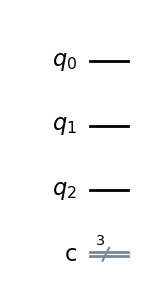

In [3]:
qr = QuantumRegister(3, name='q')  
cr = ClassicalRegister(3, name='c')
circuit = QuantumCircuit(qr, cr)
circuit.draw(output="mpl")

<div id="addingGates"> 
    <h2>Adding Gates</h2>
    We put Hadamard (superposition) gates on each qbit, and putting everything together, organize (including a barrier) and display the circuit.
</div>


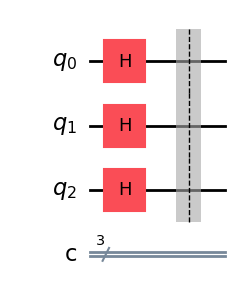

In [4]:
circuit.h(qr)
circuit.barrier()
circuit.draw(output="mpl")

<div id="hadamardExa"> 
    <h3>Example: Hadamard Gate</h3>
    This is an example of Hadamard implementation:
Let's define the Hadamard operator using Dirac Notation, AKA, ket-notation.

$$
H =\frac{1}{\sqrt{2}}
\bigg(
\Big(|0 \rangle +|1 \rangle\Big)\bra{0}
+
\Big(|0 \rangle-|1 \rangle\Big)\bra{1}
\bigg)
=
\frac{1}{\sqrt{2}}
\bigg(
|0\rangle \langle 0 |+|1\rangle\langle 0 |
+
|0\rangle\langle 1 |-|1\rangle\langle 1 |
\bigg)
$$ 
We operate $H| 0 \rangle.$ Therefore,
$$
H | 0 \rangle=
\bigg(\frac{1}{\sqrt{2}}
\bigg(
|0\rangle \langle 0 |+|1\rangle\langle 0 |
+
|0\rangle\langle 1 |-|1\rangle\langle 1 |
\bigg)\bigg) |0\rangle
$$ 
and expanding we have,

$$
H| 0 \rangle =
\frac{1}{\sqrt{2}}
\bigg(
|0\rangle \langle 0 |0\rangle+|1\rangle\langle 0 |0\rangle
+
|0\rangle\langle 1 |0\rangle-|1\rangle\langle 1 |0\rangle
\bigg)=
\frac{1}{\sqrt{2}}
\bigg(|0\rangle +|1\rangle\bigg)
$$ 
Aftery applying Hadamard gate, we have a state as a superposition of two states.
</div>


<div id="addingtheOracle"> 
    <h2>Adding the Oracle</h2>
    The oracle marks the states, flips the phase of the marked state. Important: the target and target qbits shouldn't be in the computational basis state, to have effect and have entanglement.
</div>


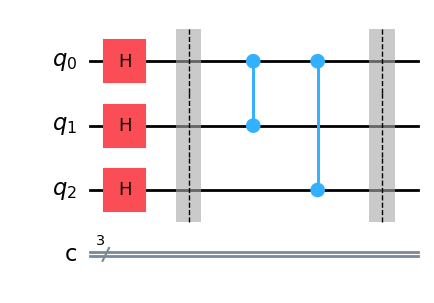

In [5]:
circuit.cz(qr[0], qr[1])
circuit.cz(qr[0], qr[2])
circuit.barrier()
circuit.draw(output="mpl")

<div id="controlZExa"> 
    <h3>Example: Control-Z Gate</h3>
Let's define the CZ operator using Dirac Notation, AKA, ket-notation.

$$
CZ 
=
\bigg(
|00\rangle \langle 00 |+|01\rangle\langle 01 |
+
|10\rangle\langle 10 |-|11\rangle\langle 11 |
\bigg)
$$ 
Applying CZ gate flips the phase of the $|11\rangle$ state.
</div>


    This is an example of CZ implementation:

$$
CZ |11\rangle =
\bigg(
|00\rangle \langle 00 |+|01\rangle\langle 01 |
+
|10\rangle\langle 10 |-|11\rangle\langle 11 |
\bigg) |11\rangle
=
\bigg(
|00\rangle \langle 00 |11\rangle+|01\rangle\langle 01 |11\rangle
+
|10\rangle\langle 10 |11\rangle-|11\rangle\langle 11 |11\rangle
\bigg)\\
=
-|11\rangle
$$ 
</div>



<div id="oracleorDifussion"> 
    <h2>Oracle or Difussion: that's a part</h2>
Inversion around the average. To follow these steps the reader can check  
<a href="https://qaldas.github.io/quaker-ece/sec2-chap3.html">Examples 3.2.1 and Examples 3.2.4</a>, particularly for the phase inversion about the average. 

<img
src="https://qaldas.github.io/quaker-ece/external/grover3.png" width="350" align="center">
</div>


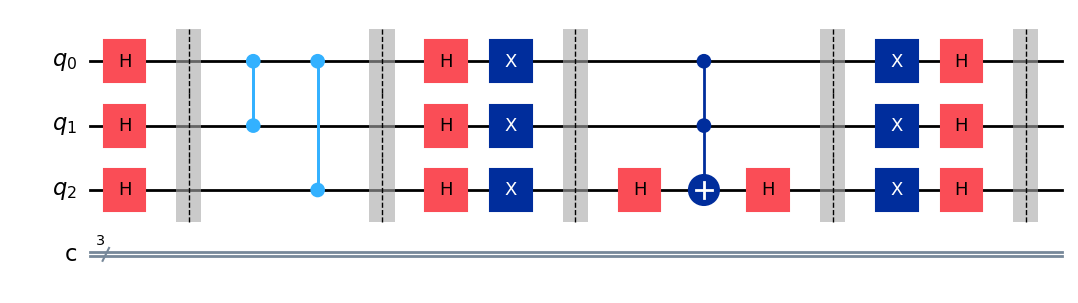

In [6]:
circuit.h(qr)
circuit.x(qr)
circuit.barrier()
circuit.h(qr[2])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.h(qr[2])
circuit.barrier()
circuit.x(qr)
circuit.h(qr)
circuit.barrier()
circuit.draw(output="mpl")

<div id="measure"> 
    <h2>Measure</h2>
This part is relevant to have the final states, output. 
</div>


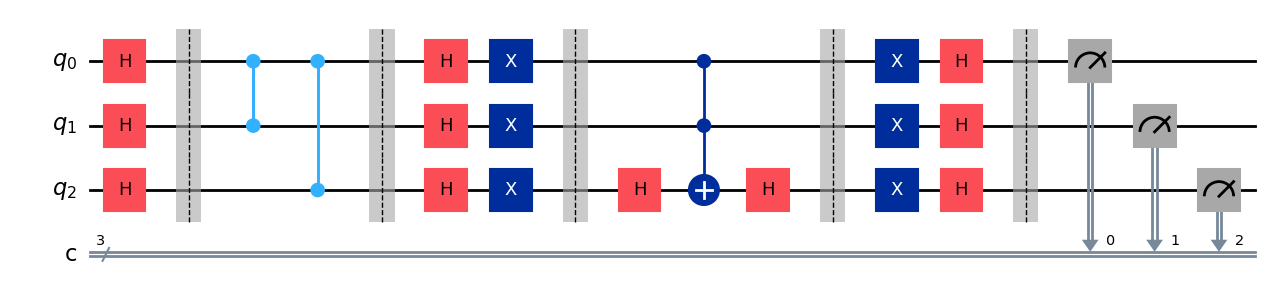

In [7]:
circuit.measure(qr, cr)
circuit.draw(output="mpl")

<div id="simulate"> 
    <h2>Simulate</h2>
Run our circuit with local simulator, we will do this using function and methods Python build-in.
</div>

In [8]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = backend.run(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)

{'101': 501, '011': 523}


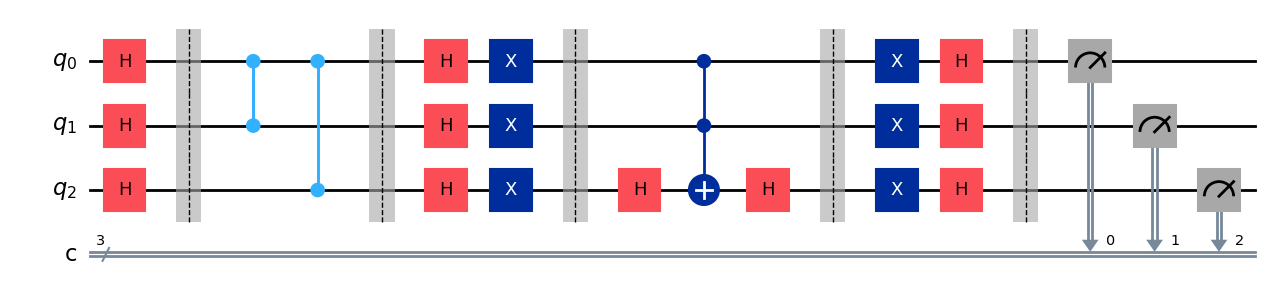

In [ ]:
circuit.draw(output="mpl")

Exercies
Go to section Adding the Oracle (addingtheOracle) and change the qbits in the CZ gates. Discuss your results.

<hr>

<div id="versions">
    <h2>Package's Versions</h2>
    Please check this line to avoid potential compatibility issues.
</div>


In [10]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.10.15
qiskit==1.2.1
qiskit-aer==0.13.3
qiskit-ibm-provider==0.11.0


# Exercises



# References

[0] [Grover Algorithm implementation 1](https://github.com/jaorduz/QuantumComputingExamples/blob/master/06_Grovers_Algorithm.py)

[1] [Grover Algorithm implementation 2](https://www.quantiki.org/wiki/grovers-search-algorithm)